# Telecom Customer Churn Prediction
By Hans Darmawan - JCDS2602

---
## Section 1. Business Understanding
### 1.1 Background

XYZ Company is a leading telecommunications provider known for its innovative services and customer-centric approach. Operating in a highly competitive market, XYZ Company offers a wide range of telecom solutions, including mobile, broadband, and digital services, catering to both individual and business customers. Despite its strong market presence, XYZ Company faces challenges related to customer churn, a critical issue that impacts its revenue and growth. By leveraging data analytics and customer insights, XYZ Company aims to mitigate churn and enhance customer retention, ensuring long-term sustainability and profitability in the dynamic telecom industry.

Customer churn in the telecom industry refers to the rate at which existing customers discontinue using a telecom service within a specific period. This phenomenon is critical because it directly affects a company's revenue and profitability. Customers may churn due to dissatisfaction with service quality, uncompetitive pricing, poor customer support, or more attractive offers from competitors. Understanding and managing churn is essential for telecom companies to maintain a stable customer base and financial health (O'Brien & Downie, 2024; Britto, 2024; Luck, 2023; Investopedia Team, 2024).

Churn is essentially the opposite of customer retention, measuring the number of customers lost over a given timeframe. In subscription-based services like telecom, churn immediately impacts revenue since it involves the loss of recurring payments. The churn rate is calculated as the percentage of customers lost relative to the total number of customers at the start of the period. For example, if a company starts with 300 customers and loses 50 within a year, the churn rate is approximately 16.67% (Luck, 2023).

In the telecom sector, churn is particularly significant because high churn rates can lead to financial losses and hinder growth. Acquiring new customers is often more expensive than retaining existing ones, making it vital for companies to focus on reducing churn by improving service quality, offering competitive pricing, and enhancing customer engagement (O'Brien & Downie, 2024; Luck, 2023; Britto, 2024; Investopedia Team, 2024).

### 1.2 Gap Analysis
The gap analysis for the telecom customer churn prediction project identifies key areas for improvement. Currently, the company lacks a predictive model to identify customers at risk of churning, which limits its ability to implement effective retention strategies. There are significant gaps in data quality, stakeholder engagement, and model interpretability, which can hinder informed decision-making. Additionally, establishing a continuous improvement process is essential to adapt to changing customer behaviors, along with integrating predictive insights into operational workflows. By addressing these gaps, the company can reduce churn rates, enhance customer retention, and improve overall business performance.

### 1.3 Problem Statements
- Which customers are likely to churn?
- What factors influence customer churn the most?
- How can the company reduce churn and improve customer retention?

### 1.4 Goals
- Develop a predictive model to classify customers as churn or no churn.
    + In the telecom sector, predicting which customers are likely to churn involves analyzing customer data to identify patterns and behaviors that indicate a high risk of leaving. This can be achieved by using machine learning models trained on historical data. Classification models are commonly used for this purpose (Kumari et al., 2025; IQ Team, 2025). By identifying at-risk customers, companies can implement targeted retention strategies to reduce churn.
- Identify key features affecting churn.
    + Understanding the factors that drive customer churn is essential for developing effective retention strategies. Feature importance analysis from machine learning models helps identify which attributes have the strongest impact on churn likelihood. For instance, high monthly charges or poor customer service experiences are often significant predictors of churn (Kumari et al., 2025; Bhatnagar & Srivastava, 2025). By focusing on these key factors, businesses can optimize their services and improve customer satisfaction.
- Provide actionable insights for business to reduce churn.
    + To reduce churn and enhance retention, telecom companies can leverage insights from predictive models to implement targeted strategies. These may include offering personalized plans, discounts, or improved customer support to at-risk customers. Additionally, addressing common issues highlighted by churn predictors—such as high costs or poor service quality—can reduce overall churn rates. By combining predictive insights with business actions, companies can maximize customer lifetime value and reduce acquisition costs, which are typically higher than retention costs (BlastChar, 2018; Bhatnagar & Srivastava, 2025).

### 1.5 Analytical Approach
- Business Understanding  
    + The problem of customer churn is identified as a critical challenge for XYZ Telecom. A predictive model is required to address this issue effectively. The business impact of churn is analyzed to ensure long-term profitability.  
- Data Understanding  
    + The dataset is explored to uncover patterns and anomalies. Missing values and duplicates are checked to ensure data quality. Distributions of key features are visualized to understand their relationships with churn.  
- Data Preparation  
    + The target variable is converted into a binary format for modeling. Categorical features are encoded. The data is split into training and testing sets for evaluation.  
- Modeling  
    + Multiple machine learning algorithms and numerical scaling methods are tested to identify the best performer. Class imbalance is addressed using resampling techniques. Decision thresholds are optimized to improve recall for churn prediction.  
- Evaluation  
    + Model performance is measured using recall. Key drivers of churn are interpreted using explainability tools. A confusion matrix is generated to visualize prediction accuracy.  
- Deployment  
    + The final model is saved for future use. Predictions are made on new customer data to flag churn risks.
### 1.6 Metric Evaluation
- Business Metric: Reduction in churn rate.
- Machine Learning Evaluation Metric: Accuracy, Precision, Recall, F1-score, ROC-AUC.

### 1.7 Success Criteria
- Achieve high classification performance on recall (>=80).
- Provide interpretable insights for business decisions.
- Demonstrate model effectiveness on unseen data.

## Section 2. Data Understanding
### 2.1 Dataset Information

In [1]:
import os
import warnings
from pathlib import Path

# Disable LOKY debug logs
os.environ["LOKY_DEBUG"] = "0"

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Model explainability
import lime.lime_tabular

# Imbalanced-learn (sampling)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import (
    ADASYN,
    BorderlineSMOTE,
    KMeansSMOTE,
    RandomOverSampler,
    SMOTE,
    SMOTENC,
    SMOTEN,
    SVMSMOTE,
)
from imblearn.pipeline import Pipeline as ImbPipeline

# Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    # accuracy_score,
    # brier_score_loss,
    classification_report,
    confusion_matrix,
    # f1_score,
    precision_recall_curve,
    # precision_score,
    recall_score,
    # roc_auc_score,
    # roc_curve,
)
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Gradient boosting frameworks
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Joblib for model persistence
import joblib


# Suppress all warnings
warnings.filterwarnings("ignore")

# Set pandas display options for better visibility
pd.set_option("display.max_columns", None)

# Set Seaborn theme for better aesthetics
sns.set_theme()


data_path = Path(r"C:\Users\User\Documents\Purwadhika\JCDS 2602\Capstone Project\telco-churn\data\raw\data.csv")

if data_path.exists():
    real_df = pd.read_csv(data_path)
    df = real_df.copy()
    print(df.info())
    display(df.head())
else:
    print(f"File not found: {data_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


The provided summary of the DataFrame indicates that it contains a total of 4,930 entries, which represent individual customers or accounts. The DataFrame is structured with 11 columns, each capturing specific attributes related to the customers' service usage and characteristics.

Among the columns, the Dependents field identifies whether customers have dependents, while tenure reflects the duration, in months, that customers have maintained their service. Several columns, such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, denote the availability of various service options, illustrating the range of features customers can choose. The InternetService column specifies the type of internet service provided, which may influence customer satisfaction and retention.

Additionally, the Contract column indicates the nature of the customer's agreement with the service provider, and PaperlessBilling shows whether customers have opted for electronic billing. The MonthlyCharges column presents the cost incurred by each customer monthly, providing insight into the pricing structure. Finally, the Churn column indicates whether a customer has discontinued their service, which is crucial for understanding customer retention and satisfaction. In details, the column breakdowns as per below:

<table>
    <tr>
        <th>Column Name</th>
        <th>Importance</th>
        <th>Impact to Business</th>
    </tr>
    <tr>
        <td>Dependents</td>
        <td>Moderate</td>
        <td>Understanding customer demographics can aid in targeted marketing strategies.</td>
    </tr>
    <tr>
        <td>Tenure</td>
        <td>High</td>
        <td>Longer tenure often indicates customer loyalty, impacting retention strategies.</td>
    </tr>
    <tr>
        <td>OnlineSecurity</td>
        <td>High</td>
        <td>Customers with online security are likely to feel safer, reducing churn.</td>
    </tr>
    <tr>
        <td>OnlineBackup</td>
        <td>Moderate</td>
        <td>Offering online backup can enhance customer satisfaction and retention.</td>
    </tr>
    <tr>
        <td>InternetService</td>
        <td>High</td>
        <td>Understanding service subscriptions helps in optimizing service offerings.</td>
    </tr>
    <tr>
        <td>DeviceProtection</td>
        <td>Moderate</td>
        <td>Device protection can be a key selling point for tech-savvy customers.</td>
    </tr>
    <tr>
        <td>TechSupport</td>
        <td>High</td>
        <td>Good tech support can significantly reduce churn and improve customer satisfaction.</td>
    </tr>
    <tr>
        <td>Contract</td>
        <td>High</td>
        <td>Contract types influence customer retention and revenue predictability.</td>
    </tr>
    <tr>
        <td>PaperlessBilling</td>
        <td>Moderate</td>
        <td>Encouraging paperless billing can reduce costs and appeal to environmentally conscious customers.</td>
    </tr>
    <tr>
        <td>MonthlyCharges</td>
        <td>High</td>
        <td>Understanding pricing impacts customer acquisition and retention strategies.</td>
    </tr>
    <tr>
        <td>Churn</td>
        <td>Critical</td>
        <td>Churn rate is a key performance indicator for business health and customer satisfaction. This column will be used as target.</td>
    </tr>
</table>

### 2.2 Missing Values Checking

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


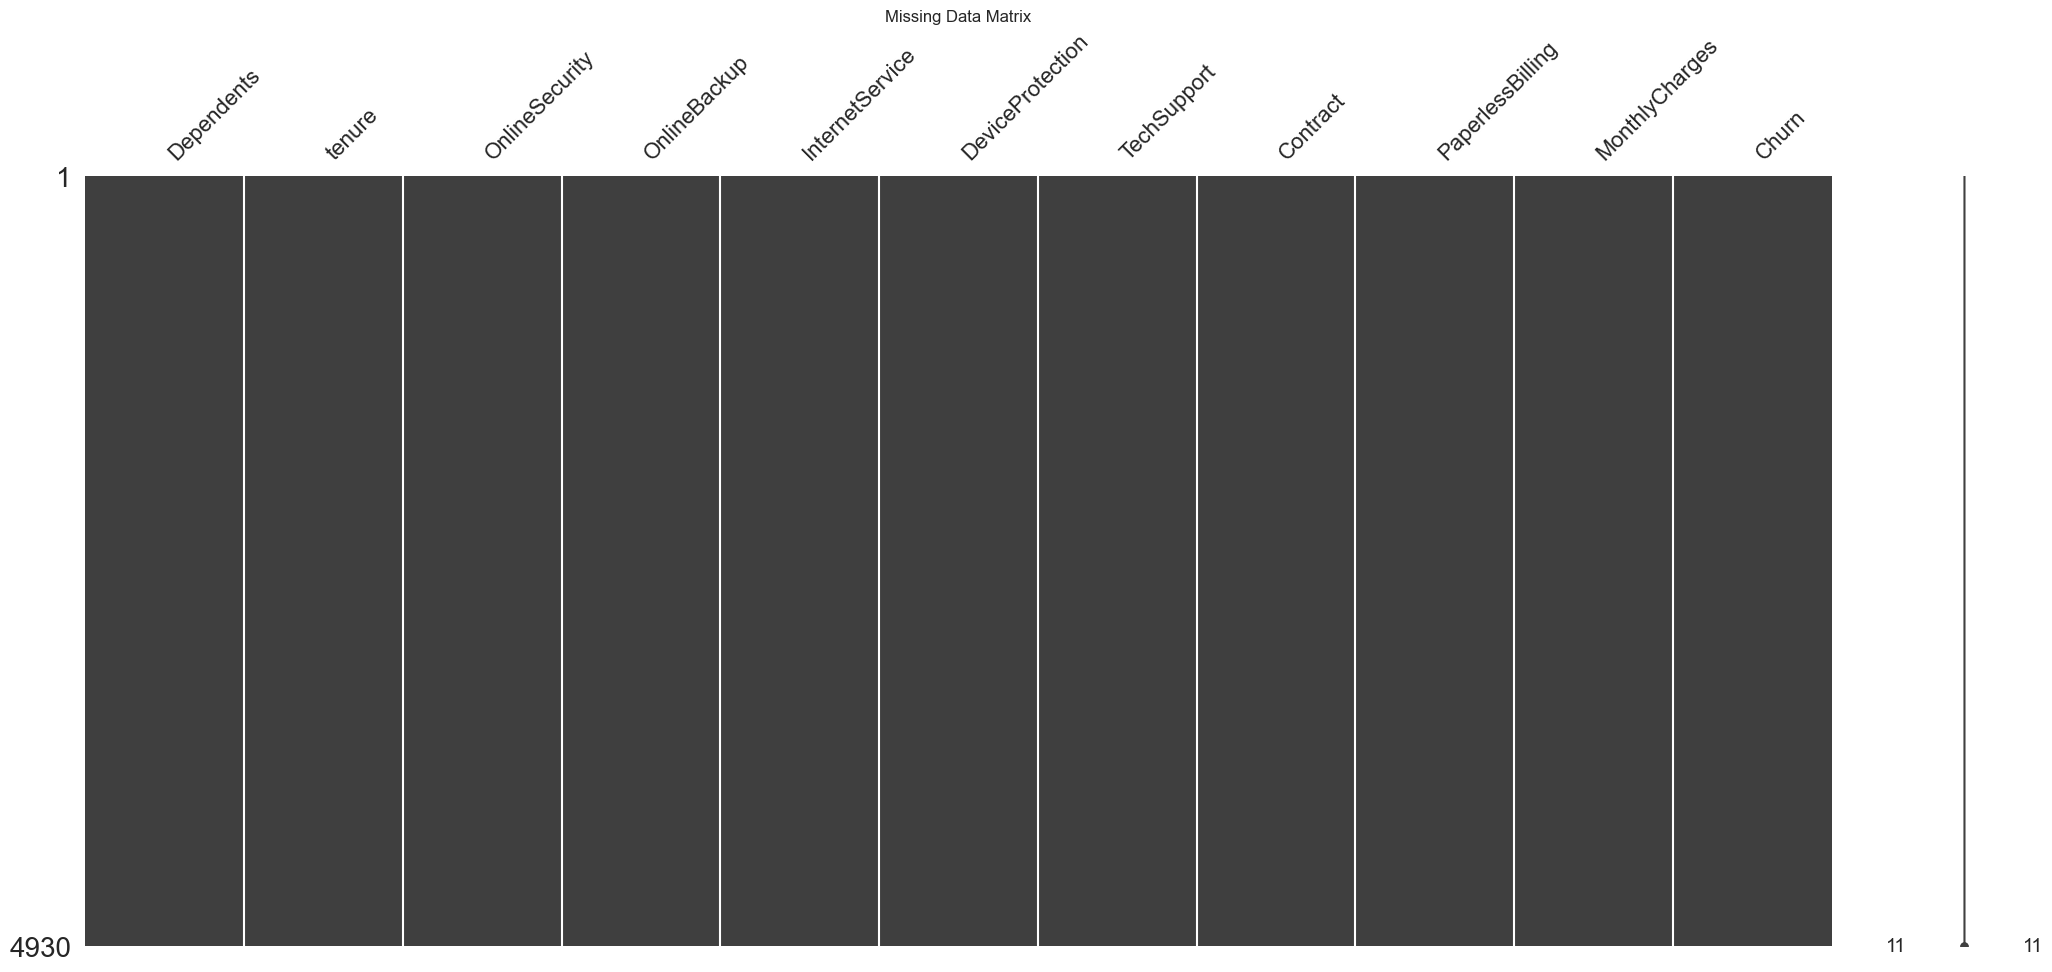

In [2]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

The summary indicates that there are no missing values across any of the columns in the DataFrame, which consists of 4,930 entries. Each attribute, including Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, and Churn, has a complete dataset with zero missing entries. This completeness is crucial for conducting accurate analyses and drawing reliable conclusions.

The accompanying visual representation, a missing data matrix, further emphasizes this finding. Each column is displayed without any gaps, confirming that all data points are accounted for. This absence of missing values enhances the integrity of the dataset, allowing for more robust statistical evaluations and insights into customer behavior and service usage. Overall, the DataFrame is well-prepared for further analysis, ensuring that any insights derived will be based on a comprehensive and complete dataset.

### 2.3 Duplicated Values Checking

In [3]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 77


The presence of 77 duplicated rows in this dataset indicates that these rows are exact copies of others within the same data. Such duplicates can arise from data entry errors, system issues, or legitimate repeated events depending on the context. However, removing duplicates is not always the best course of action.

One reason to retain duplicates is that they may represent valid repeated observations or transactions, which are important for accurate analysis. For example, in transactional data or repeated measurements, duplicates reflect real-world occurrences rather than errors. Removing them could distort data distributions and lead to misleading results. Additionally, duplicates can help validate data consistency and quality during data processing (Oracle Community, 2024).

Moreover, certain analytical methods and visualizations rely on the frequency of data points, where duplicates provide meaningful information rather than noise. Understanding the origin and significance of duplicates is essential before deciding to remove them, as their removal may compromise data integrity and analytical validity (Imhoff, Galemmo, & Geiger, 2003).

In summary, while duplicates often indicate data quality issues, they can also carry important information depending on the dataset and context. Careful assessment ensures that valuable data is preserved, supporting reliable and valid analysis.

### 2.4 Dataset Restructuring for Better EDA

In [4]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
df[object_cols] = df[object_cols].astype('category')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Dependents        4930 non-null   category
 1   tenure            4930 non-null   int64   
 2   OnlineSecurity    4930 non-null   category
 3   OnlineBackup      4930 non-null   category
 4   InternetService   4930 non-null   category
 5   DeviceProtection  4930 non-null   category
 6   TechSupport       4930 non-null   category
 7   Contract          4930 non-null   category
 8   PaperlessBilling  4930 non-null   category
 9   MonthlyCharges    4930 non-null   float64 
 10  Churn             4930 non-null   category
dtypes: category(9), float64(1), int64(1)
memory usage: 121.6 KB


The DataFrame is restructured for better Exploratory Data Analysis (EDA) because the initial data types are not relevant. This restructuring is performed to enhance the efficiency and clarity of the data, which is crucial for effective analysis. The object columns are converted to categorical data type, a process that is often necessary to ensure that the data is properly formatted for statistical and machine learning tasks (McKinney, 2017; VanderPlas, 2016).

The conversion of object columns to categorical data type is achieved by using the astype('category') method in Pandas. This approach not only improves memory efficiency but also ensures that the data is treated appropriately during analysis. The changes are confirmed by checking the updated data types of the DataFrame using the info() method, which provides a summary of the DataFrame's structure and memory usage (McKinney, 2017; VanderPlas, 2016).

The restructuring process is facilitated by identifying the object columns and applying the necessary conversion. This step is essential in maintaining data integrity and ensuring that the analysis is conducted on the correct data types. The use of categorical data types can also help in reducing errors that might arise from treating categorical variables as strings (Wickham & Grolemund, 2017; McKinney, 2017).

### 2.5 Exploratory Data Analysis (EDA)

#### 2.5.1 Statistics Summary

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


The dataset includes information on customer tenure and monthly charges for 4,930 customers. The average tenure is about 32.4 months, with some customers just starting and others staying up to 72 months. Most customers have been with the service for less than 55 months, with 25% staying 9 months or less. Monthly charges vary widely, averaging around 64.88 units. Charges range from 18.8 to 118.65 units, with half of the customers paying less than 70.35 units. Overall, the data shows a diverse range of customer lengths and monthly payments.

In [6]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


For the "Dependents" variable, there are two categories, with the majority (3,446 customers) reporting no dependents. The "OnlineSecurity" and "OnlineBackup" features each have three categories, with "No" being the most common response, reported by 2,445 and 2,172 customers respectively. The "InternetService" variable also has three categories, with "Fiber optic" being the most frequent choice at 2,172 customers.

Regarding "DeviceProtection" and "TechSupport," both have three categories, and "No" is the most common response, with 2,186 and 2,467 customers respectively. The "Contract" variable has three categories, with "Month-to-month" contracts being the most frequent at 2,721 customers. For "PaperlessBilling," there are two categories, with the majority (2,957 customers) opting for paperless billing. Finally, the "Churn" variable, which likely indicates whether a customer has left the service, has two categories, with most customers (3,614) not having churned.

#### 2.5.2 Proportion Analysis

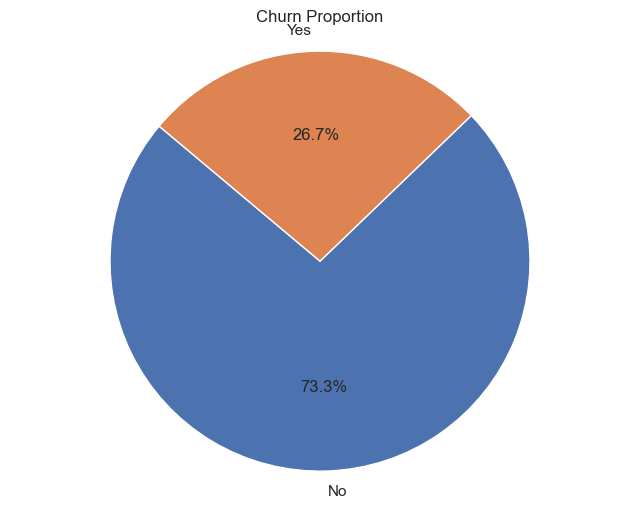

In [7]:
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(churn_proportion, labels=churn_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Proportion')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

The pie chart displays the proportion of customers who churn versus those who do not. It shows that approximately 26.7% of customers have churned, while the majority, 73.3%, have remained with the service. This indicates that about one in four customers choose to leave, highlighting a notable churn rate. In terms of dataset balance, this distribution is considered imbalanced because the classes are not evenly represented—about 73% of customers stay while only 27% churn. Commonly, a dataset is regarded as imbalanced if one class exceeds 70% of the total observations (He & Garcia, 2009). Such imbalance can affect the performance of predictive models, as many algorithms may be biased toward the majority class. Special techniques such as resampling, class weighting, or using algorithms designed to handle imbalance may be needed to build effective churn prediction models (He & Garcia, 2009).

#### 2.5.3 Boxplot and Histogram Analysis

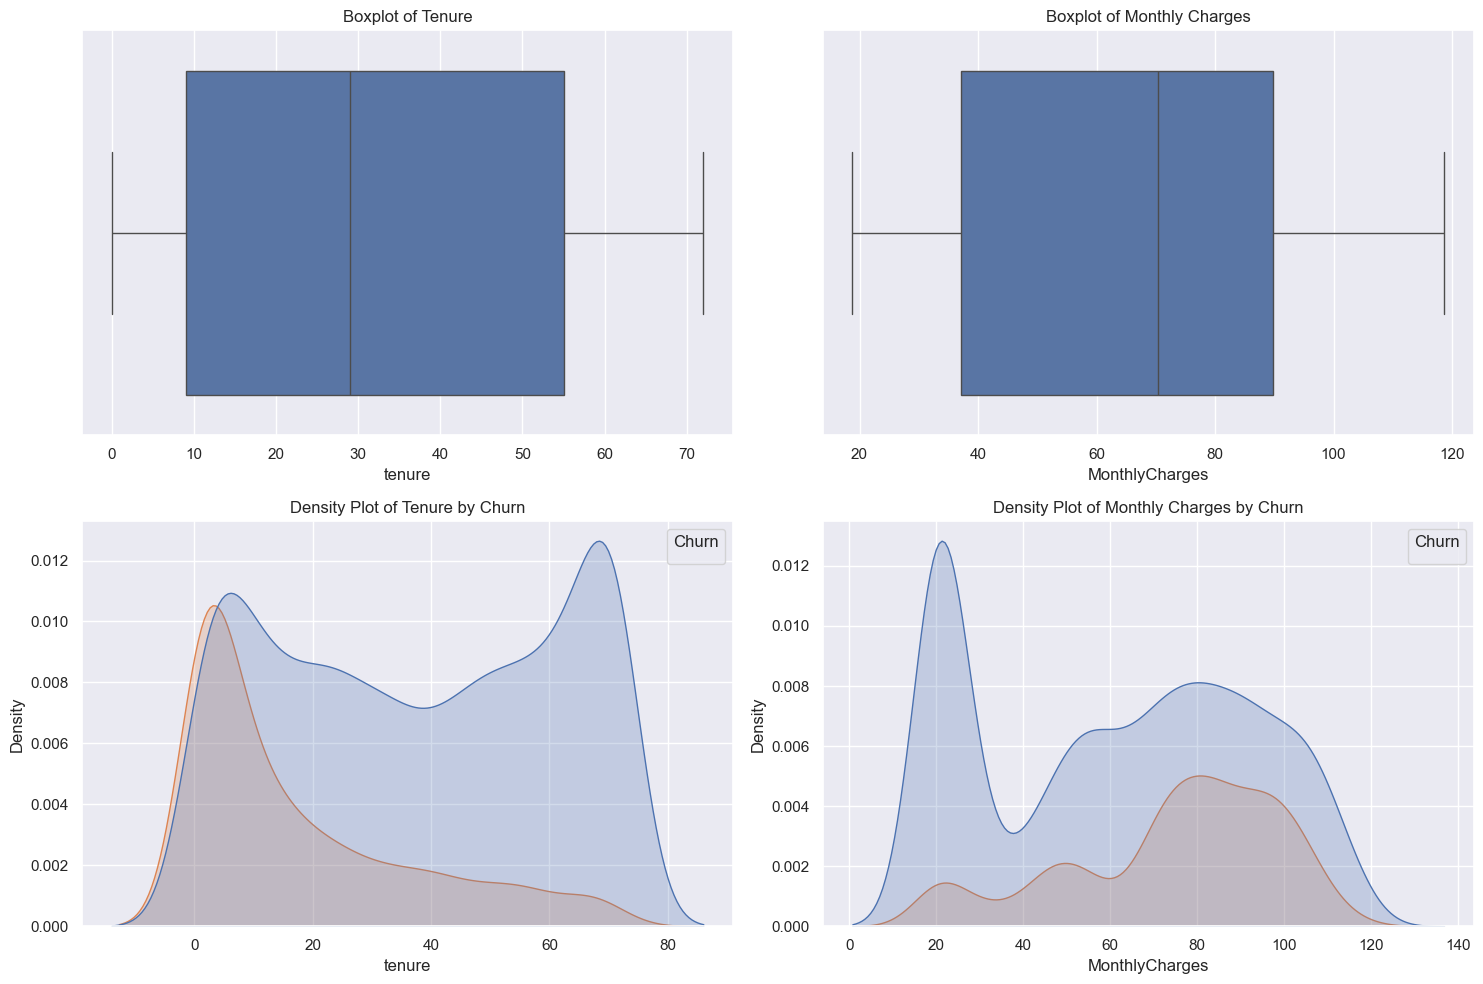

In [8]:
# Select numeric columns
numerics = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1st subplot: Boxplot of 'tenure'
sns.boxplot(x=df['tenure'], orient='h', ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# 2nd subplot: Boxplot of 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], orient='h', ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

# 3rd subplot: KDE plot for 'tenure' by 'Churn'
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, ax=axes[2])
axes[2].set_title('Density Plot of Tenure by Churn')
axes[2].legend(title='Churn')

# 4th subplot: KDE plot for 'MonthlyCharges' by 'Churn'
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[3])
axes[3].set_title('Density Plot of Monthly Charges by Churn')
axes[3].legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()

The tenure boxplot shows that customer tenure ranges widely, from 0 to about 72 months. The median tenure is around 29 months, meaning half of the customers stay less than two and a half years, and the other half stay longer. Most customers fall between 9 and 55 months, with no extreme outliers. The data is fairly balanced between short-term and long-term customers.

The monthly charges boxplot indicates that charges vary from about $18 to $118. The median charge is about $70, with most customers paying between $37 and $91. Like tenure, the distribution is fairly even with no unusual values. This suggests that while monthly charges differ, most customers pay within a moderate range. Overall, these plots show clear and consistent patterns in customer tenure and billing.

The density plots reveal important differences between customers who churn and those who do not. For tenure, customers who churn tend to have much shorter tenures, with a peak near zero months, indicating they leave early. In contrast, customers who do not churn show a bimodal distribution with peaks around 1–2 months and again near 70 months, reflecting both new and long-term loyal customers. For monthly charges, customers who churn generally have lower charges, mostly below $40, while those who stay tend to have higher charges spread across a wider range, with peaks near $20 and between $60 and $100.

Since the data is not normally distributed and does not contain outliers, careful consideration should be given to the choice of scaling method to ensure effective model performance. Both Min-Max Scaling and Robust Scaling are recommended to be benchmarked. With Min-Max Scaling, the data is rescaled to a fixed range, typically between 0 and 1, allowing the original distribution shape to be preserved and making it suitable for algorithms requiring normalized inputs (Jain, 2010). In contrast, Robust Scaling is applied using the median and interquartile range, which makes it less sensitive to any potential outliers or skewness, even if minimal (Liu et al., 2020). By comparing both methods, it can be determined which scaling approach better suits the specific dataset and modeling goals, balancing the preservation of data distribution with robustness to subtle irregularities.

#### 2.5.4 Unique Values Analysis

In [9]:
cat_cols = df.select_dtypes(include=['category']).columns

# Dictionary of unique counts per categorical column
unique_counts = {col: df[col].nunique() for col in cat_cols}

# Dictionary of unique values lists per categorical column
unique_values_list = {col: df[col].unique().tolist() for col in cat_cols}

unique_summary = pd.DataFrame({'unique_counts': unique_counts, 'unique_values': unique_values_list})
unique_summary

,unique_counts,unique_values
Dependents,2,"[Yes, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[No, Yes, No internet service]"
InternetService,3,"[DSL, Fiber optic, No]"
DeviceProtection,3,"[Yes, No internet service, No]"
TechSupport,3,"[Yes, No, No internet service]"
Contract,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,2,"[Yes, No]"
Churn,2,"[Yes, No]"


The dataset contains several categorical variables that are primarily nominal in nature. Variables such as "Dependents," "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "InternetService," "PaperlessBilling," and the target variable "Churn" are classified as nominal. These variables consist of categories that represent distinct groups without any inherent order or ranking. For example, the categories "Yes," "No," and "No internet service" in service-related features serve as labels rather than ordered values. Nominal variables require encoding methods that do not impose ordinal relationships, such as one-hot encoding (Liu et al., 2020).

The only variable identified as ordinal is "Contract," which includes categories like "Month-to-month," "One year," and "Two year." These categories have a natural order based on contract duration, which implies a ranking that should be preserved during encoding. Ordinal variables can be encoded using techniques such as label encoding or ordinal encoding to maintain the meaningful sequence of categories (Liu et al., 2020).

For encoding, it is recommended that nominal variables be transformed using one-hot encoding to avoid introducing artificial order, while the ordinal variable should be encoded with methods that preserve the inherent order of its categories. This approach ensures that the model accurately interprets the categorical data without biasing relationships among categories. Proper encoding is essential for effective feature representation and improved model performance in telecom churn prediction (He & Garcia, 2009; Kumari et al., 2025).

#### 2.5.5 Feature Distribution Analysis (Categorical)

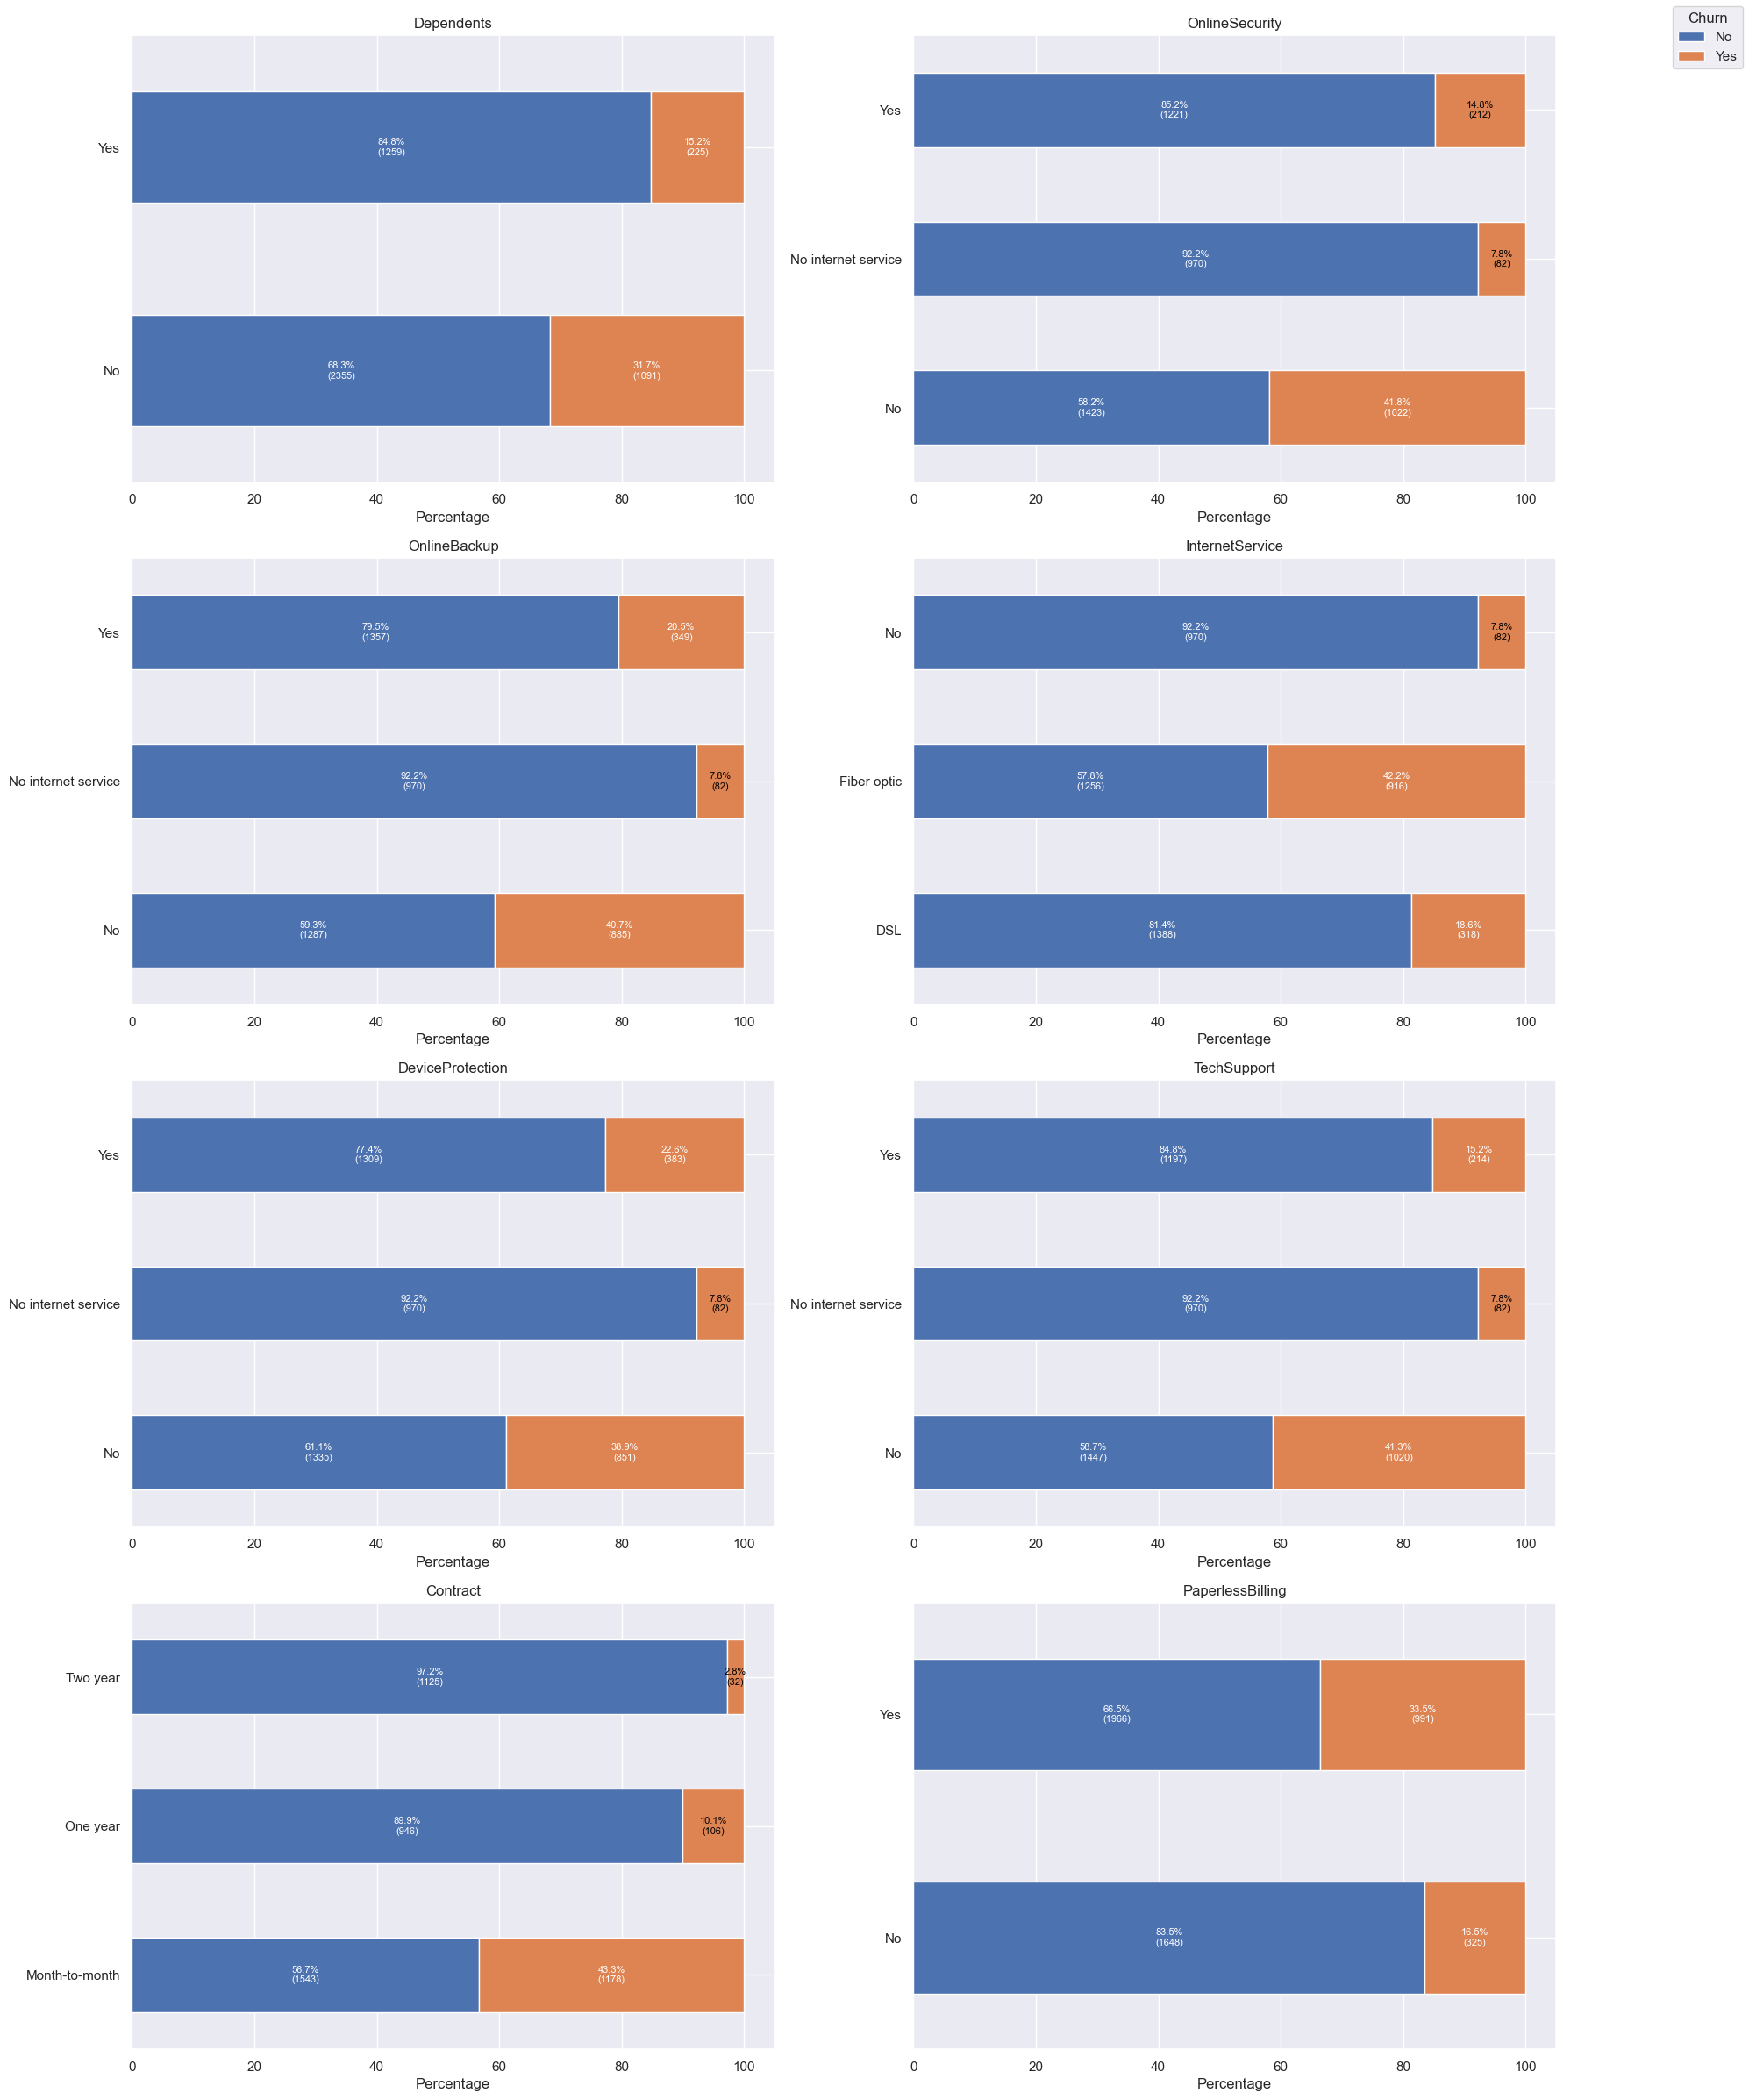

In [10]:
categorical_cols = df.select_dtypes(include='category').columns.drop('Churn')

num_plots = len(categorical_cols)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Compute counts per category and churn status with observed=True
    counts = df.groupby([col, 'Churn'], observed=True).size().unstack(fill_value=0)
    
    # Convert counts to percentages per category level (row-wise)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plot horizontal stacked bar chart on the subplot axis
    percentages.plot(kind='barh', stacked=True, ax=ax, legend=False)
    
    ax.set_title(f'{col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    
    # Annotate each segment with percentage and count
    for j, (index, row) in enumerate(percentages.iterrows()):
        cum_width = 0
        for churn_status in percentages.columns:
            pct = row[churn_status]
            cnt = counts.loc[index, churn_status]
            if pct > 0:
                label = f'{pct:.1f}%\n({cnt})'
                ax.text(cum_width + pct / 2, j, label, ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
                cum_width += pct

# Remove any unused subplots
for k in range(i + 1, len(axes)):
    fig.delaxes(axes[k])

# Create one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on right for legend
plt.show()

The visualizations display the distribution of customer churn across various categorical features in the telecom dataset. For the variable Dependents, customers without dependents show a notably higher churn rate (31.7%) compared to those with dependents (15.2%). This suggests that customers with dependents tend to stay longer with the service.

In terms of OnlineSecurity, customers who do not have this service exhibit a higher churn rate (41.8%) compared to those who have it (14.8%) or those without internet service (7.8%). A similar pattern is observed for OnlineBackup, where customers lacking the service show a churn rate of 40.7%, much higher than customers with the service (20.5%) or no internet service (7.8%). This trend indicates that the presence of security and backup services may reduce the likelihood of churn.

The InternetService type also influences churn rates. Customers using Fiber optic service have the highest churn rate at 42.2%, while those with DSL service churn at 18.6%, and customers without internet service churn the least at 7.8%. This suggests that fiber optic customers may be more prone to leaving, possibly due to service or pricing factors.

For DeviceProtection, customers without the service show a churn rate of 38.9%, which is considerably higher than those with the service (22.6%) or no internet service (7.8%). Similarly, TechSupport follows this pattern, with a churn rate of 41.3% for customers without support, compared to 15.2% for those with it and 7.8% for those without internet.

The Contract type exhibits a strong relationship with churn. Customers on a month-to-month contract have the highest churn rate (43.3%), while those with one-year and two-year contracts have much lower churn rates of 10.1% and 2.8%, respectively. This confirms that longer contract durations are associated with better customer retention.

Finally, PaperlessBilling shows that customers using paperless billing churn more (33.5%) than those who do not (16.5%). This may reflect behavioral or demographic differences that warrant further investigation.

Overall, these patterns highlight that service features, contract type, and billing preferences are important factors related to customer churn. Such insights can guide targeted retention strategies and inform feature selection for predictive modeling (Kumari et al., 2025; He & Garcia, 2009).

#### 2.5.6 Correlation Analysis

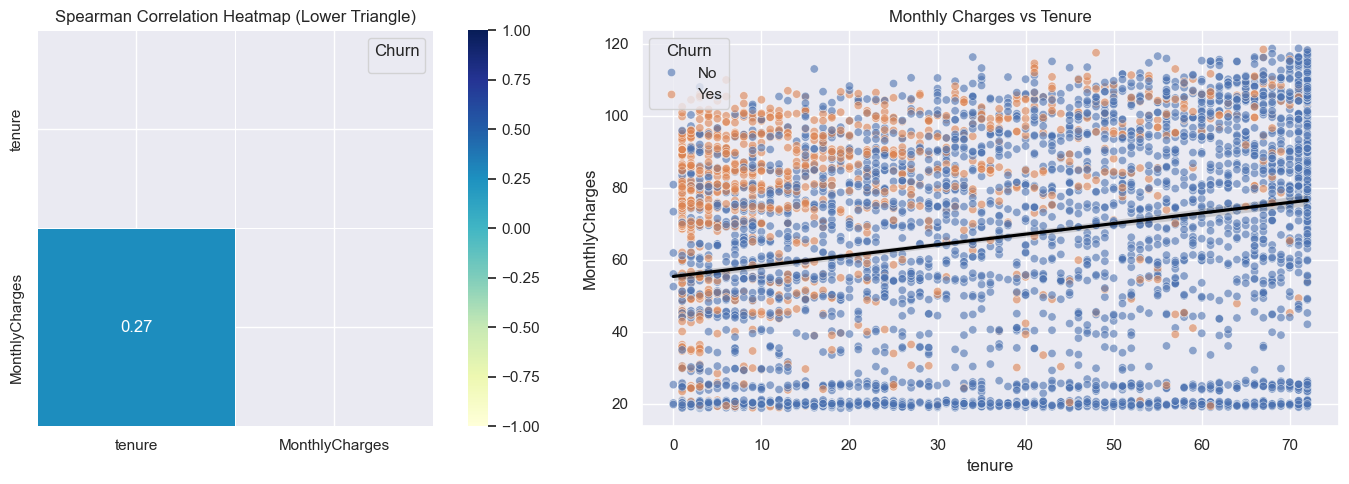

In [11]:
# Compute Spearman correlation matrix for numeric columns
corr = df.corr(numeric_only=True, method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st subplot: KDE plot for 'tenure' by 'Churn'
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Spearman Correlation Heatmap (Lower Triangle)')

# 2nd subplot: Scatter plot for 'MonthlyCharges' vs 'tenure' colored by 'Churn'
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[1], alpha=0.6)

# Add regression line to the scatter plot
sns.regplot(data=df, x='tenure', y='MonthlyCharges', ax=axes[1], scatter=False, color='black')

axes[1].set_title('Monthly Charges vs Tenure')

# Show the legend
for ax in axes:
    ax.legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()

The Spearman rank correlation coefficient is a non-parametric measure that assesses the strength and direction of a monotonic relationship between two variables without assuming linearity or normal distribution of data (Mukaka, 2012). It quantifies how well the relationship between two variables can be described using a monotonic function, where values closer to +1 or -1 indicate stronger positive or negative monotonic relationships, respectively (Mukaka, 2012; Schober et al., 2018).

Interpretation guidelines often categorize correlation coefficients as weak, moderate, or strong, with coefficients around 0.1 to 0.3 considered weak, 0.3 to 0.5 moderate, and above 0.5 strong (Schober et al., 2018). Therefore, a coefficient of 0.27, as observed between Monthly Charges and Tenure, suggests a weak to moderate positive monotonic association, meaning that as tenure increases, monthly charges tend to increase as well, though the relationship is not very strong.

The Spearman correlation heatmap and scatter plot provide insights into the relationship between Monthly Charges and Tenure in the telecom dataset. The heatmap shows a positive correlation coefficient of 0.27 between these two variables, indicating a weak to moderate positive monotonic relationship. This suggests that as customers’ tenure increases, their monthly charges tend to increase slightly.

The scatter plot further illustrates this relationship by plotting individual customer data points, with tenure on the x-axis and monthly charges on the y-axis. A positive trend line confirms the upward trend, showing that customers with longer tenure generally incur higher monthly charges. The plot also differentiates customers based on churn status, with churned customers (in orange) scattered throughout but more concentrated at lower tenure values and higher monthly charges. This pattern implies that customers who pay higher monthly charges but have shorter tenure are more likely to churn.

Overall, these findings suggest that tenure and monthly charges are related, and their interaction is important for understanding customer behavior. The weak correlation indicates that while monthly charges tend to increase with tenure, other factors also influence churn. These insights can guide feature engineering and model development for churn prediction in telecom (He & Garcia, 2009; Kumari et al., 2025).

## Section 3. Data Preparation

### 3.1 Feature Engineering

In [12]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes,656.1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No,1157.1
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,3062.4
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No,5014.8
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No,70.8


A new feature named "TotalCharges" is created by multiplying the "tenure" and "MonthlyCharges" columns. This new variable represents the total amount charged to a customer over their entire tenure with the company. The calculation is performed to capture the cumulative revenue generated from each customer. By including this feature, additional insights into customer value and behavior can be provided. The dataset is then updated to include this newly engineered feature for further analysis and modeling.

### 3.2 Target Labeling

In [13]:
# Map target variable 'Churn' from Yes/No to 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1,656.1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0,1157.1
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1,3062.4
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0,5014.8
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0,70.8


The target variable "Churn" is transformed from categorical labels "Yes" and "No" into binary numerical values 1 and 0, respectively. This mapping facilitates the use of machine learning algorithms that require numerical input for classification tasks. The conversion standardizes the target variable, allowing for efficient model training and evaluation. After the transformation, the dataset is updated to reflect the binary encoding of the churn status.

### 3.3 Define Features and Target

In [14]:
# Define feature (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

The feature set (X) is defined by removing the 'Churn' column from the dataset, which contains the input variables for a machine learning model. Meanwhile, the target variable (y) is set to the 'Churn' column of the same DataFrame, representing the outcome that the model aims to predict.

### 3.4 Train-Test Split

In [15]:
# Stratified split to maintain target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

The train-test split procedure is a common model validation technique used to simulate how a machine learning model performs on new, unseen data. Typically, the dataset is divided into a training set, used to train the model, and a testing set, used to evaluate its performance. Common practice often involves allocating around 70% to 80% of the data for training and the remaining 20% to 30% for testing, with an 80:20 split considered a good balance between training the model sufficiently and having enough data to assess its generalization. This split helps reduce overfitting and provides a reliable estimate of model performance on future data. The stratified splitting method is recommended when dealing with imbalanced datasets to preserve the proportion of classes in both subsets, further improving model evaluation reliability (Galarnyk, 2025). 

### 3.5 Data Transformation Setup

In [16]:
# Identify categorical columns excluding target
categorical_cols = [col for col in df.select_dtypes(include=['category']).columns if col not in ['Churn', 'Contract']]

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify binary columns (with exactly 2 unique values excluding 'Churn' and 'Contract')
binary_cols = unique_summary[unique_summary['unique_counts'] == 2].index.tolist()
binary_cols = [col for col in binary_cols if col not in ['Churn', 'Contract']]

# Separate categorical columns into binary and non-binary
categorical_cols_no_binary = [col for col in categorical_cols if col not in binary_cols]

# Define the ordinal categories for 'Contract'
contract_categories = [['Month-to-month', 'One year', 'Two year']]

# Function to map 'No'->0 and 'Yes'->1 in binary columns
def map_binary_yes_no(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=binary_cols)
    for col in X.columns:
        X[col] = X[col].map({'No': 0, 'Yes': 1})
        if X[col].isnull().any():
            raise ValueError(f"Unexpected values found in column {col} during binary mapping.")
        X[col] = X[col].astype(np.int64)
    return X.values

# Function to create numeric transformer pipeline based on the scaler type
scalers = [RobustScaler(), MinMaxScaler()]
def create_numeric_transformer(scaler):
    return Pipeline(steps=[
        ('scaler', scaler)
    ])

# Function to create preprocessor with the desired scaling method
def create_preprocessor(scaler):
    numeric_transformer = create_numeric_transformer(scaler)

    binary_transformer = Pipeline(steps=[
        ('map_yes_no', FunctionTransformer(map_binary_yes_no))
    ])

    ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories=contract_categories))
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('binary', binary_transformer, binary_cols),
            ('ordinal', ordinal_transformer, ['Contract']),
            ('cat', categorical_transformer, categorical_cols_no_binary)
        ],
        remainder='passthrough'
    )

Several steps are taken to preprocess a dataset for a machine learning task, ensuring that the data is appropriately prepared for modeling. First, categorical columns are identified while excluding the target variable 'Churn' and the 'Contract' column to focus on relevant features. Numeric columns are also identified based on their data types to facilitate appropriate scaling. Additionally, binary columns, which contain exactly two unique values, are isolated, and the categorical columns are further divided into binary and non-binary categories for targeted processing.

A specific mapping function is defined to convert binary responses from 'No' and 'Yes' to 0 and 1, ensuring that the model can interpret these values correctly. The code includes a function to create a numeric transformer pipeline using different scalers, allowing for flexibility in handling various data distributions. Furthermore, a preprocessor is constructed that combines various transformations for numeric, binary, ordinal, and categorical data. This method is employed to streamline the preprocessing workflow, ensuring that each type of data is handled effectively, which is crucial for improving model performance (Idris, 2024). By using pipelines and transformers, the code enhances maintainability and scalability, making it easier to adapt to different datasets or modeling requirements.

## Section 4. Modeling

### 4.1 Model Initialization and Cross-Validation

In [17]:
# Define base models for stacking
base_models = [
    ('lr', LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('svc', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')),
]

# Define stacking classifier with logistic regression as meta-model
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_jobs=-1,
    passthrough=False
)

# Define models dictionary including stacking
models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, thread_count=-1),
    'Stacking': stacking_clf
}

# Define scoring metrics
scoring = ['recall']  # Add other metrics if needed

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store scores
list_scores = []

# Iterate over each scaler
for scaler in scalers:
    for model_name, model in models.items():
        preprocessor = create_preprocessor(scaler)  # Create preprocessor with the current scaler
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        for score in scoring:
            scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=score, n_jobs=-1)
            list_scores.append({
                'Model': model_name,
                'Metric': score,
                'Mean Score': np.mean(scores),
                'Std Dev': np.std(scores),
                'Scaler': 'Robust' if isinstance(scaler, RobustScaler) else 'MinMax'
            })

# Create DataFrame from scores
results_df = pd.DataFrame(list_scores)
results_df = results_df.sort_values(by=['Mean Score', 'Std Dev'], ascending=[False, True])
display(results_df)

# Find the best score for each metric
best_scores = results_df.loc[results_df.groupby(['Metric'])['Mean Score'].idxmax()]

# Extract the best model and scaler overall
overall_best = best_scores.loc[best_scores['Mean Score'].idxmax()]
best_model = overall_best['Model']
best_scaler = overall_best['Scaler']

# Display the best scalers for each metric
print("Best Scalers for Each Metric:")
display(best_scores[['Metric', 'Model', 'Scaler', 'Mean Score', 'Std Dev']])

print(f"\nOverall Best Model: {best_model} with {best_scaler} Scaler")

# Define the best scaler based on the identified best scaler
if best_scaler == 'Robust':
    best_scaler_instance = RobustScaler()
else:
    best_scaler_instance = MinMaxScaler()

# Update the preprocessor variable with the best scaler
preprocessor = create_preprocessor(best_scaler_instance)

# Use the updated preprocessor in final model pipeline
best_base_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])  # Use the best model from the results
])

# Display the final best pipeline
display(best_base_pipeline)

,Model,Metric,Mean Score,Std Dev,Scaler
6,AdaBoost,recall,0.542293,0.044658,Robust
18,AdaBoost,recall,0.542293,0.044658,MinMax
0,Logistic Regression,recall,0.531839,0.028766,Robust
23,Stacking,recall,0.527980,0.019277,MinMax
12,Logistic Regression,recall,0.526139,0.023607,MinMax
11,Stacking,recall,0.525141,0.016320,Robust
21,LightGBM,recall,0.525105,0.028711,MinMax
9,LightGBM,recall,0.525091,0.036267,Robust
5,Gradient Boosting,recall,0.524171,0.030767,Robust
17,Gradient Boosting,recall,0.524171,0.030767,MinMax


Best Scalers for Each Metric:


,Metric,Model,Scaler,Mean Score,Std Dev
6,recall,AdaBoost,Robust,0.542293,0.044658



Overall Best Model: AdaBoost with Robust Scaler


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x00000197BACFB560>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

#### 4.1.1 Choosing The Classification Models
Classification algorithms are fundamental components of machine learning, utilized to categorize data into predefined classes or labels. These algorithms operate on the principle of supervised learning, where a model is trained using a labeled dataset. The primary objective is to learn the relationships between input features and the corresponding output labels, enabling the model to predict the class of new, unseen data. Various types of classification algorithms exist, each with distinct methodologies and applications. Common types include logistic regression, decision trees, support vector machines, k-nearest neighbors, and Naïve Bayes (Belcic, 2024; GeeksforGeeks, 2024). Each algorithm possesses unique strengths and weaknesses, making them suitable for different classification tasks and datasets.

The foundation of classification algorithms lies in their ability to model the relationship between input features and output labels. For instance, logistic regression employs a linear approach to predict binary outcomes by estimating probabilities. Decision trees utilize a hierarchical structure, making decisions based on feature values to classify data points (GeeksforGeeks, 2024). Support vector machines aim to find the optimal hyperplane that separates different classes in high-dimensional space. K-nearest neighbors, on the other hand, classify instances based on the majority class of their closest neighbors in the feature space. Each algorithm's effectiveness is influenced by the nature of the data, including its dimensionality, distribution, and the presence of noise (Belcic, 2024). Understanding these foundational principles is crucial for selecting the most appropriate classification algorithm for a given problem.

On the other hand, ensemble learning represents a powerful technique in machine learning that combines multiple models to enhance predictive performance. The underlying principle of ensemble methods is that a group of diverse models can collectively yield better results than any single model (Murel & Kavlakoglu, 2024). Two primary types of ensemble methods are bagging and boosting. Bagging, or bootstrap aggregating, involves training multiple models independently on different subsets of the data and averaging their predictions. This approach reduces variance and helps prevent overfitting. Random forests, which are an extension of decision trees, exemplify bagging techniques (GeeksforGeeks, 2025). Conversely, boosting trains models sequentially, where each subsequent model focuses on correcting the errors made by its predecessor. This method reduces bias and enhances overall accuracy. Popular boosting algorithms include AdaBoost and Gradient Boosting. Ensemble methods have proven particularly effective in improving model robustness and generalization, especially in complex datasets (GeeksforGeeks, 2025).

Despite its popularity and simplicity, the Naïve Bayes classifier has limitations that impact its applicability in certain scenarios. One significant drawback is its reliance on the assumption of feature independence, particularly in the Gaussian Naïve Bayes variant. This assumption may not hold true for many real-world datasets, leading to suboptimal performance (IBM, n.d.). Additionally, the Bernoulli and Multinomial variants of Naïve Bayes are sensitive to the scaling of input features, which can adversely affect classification accuracy. These models assume that features follow specific distributions, which may not align with the actual data characteristics (GeeksforGeeks, 2024). As a result, the Naïve Bayes classifier may not always be the best choice for classification tasks, especially when the underlying assumptions about feature distribution and scaling are violated.

#### 4.1.2 Picking The Best Benchmarking Models

The provided code outlines a comprehensive machine learning pipeline that evaluates various classifiers to determine the best model and preprocessing strategy for a dataset. The pipeline includes a diverse set of base models, such as Logistic Regression, Random Forest Classifier, Support Vector Classifier (SVC), and XGBoost Classifier, which are used in a stacking classifier. The stacking classifier combines the predictions of these base models using a logistic regression model as the final estimator. This ensemble approach aims to enhance predictive performance by leveraging the strengths of multiple models.

To evaluate the models, the pipeline employs recall as the primary scoring metric, which measures the ability of the classifier to accurately identify positive samples. Utilizing a Stratified K-Fold cross-validation strategy enhances model evaluation by ensuring that each fold accurately reflects the overall class distribution of the dataset, thereby providing more reliable and unbiased estimates of model performance, particularly in classification tasks with imbalanced classes (Mahesh et al., 2023). The results of the cross-validation are stored in a list, which is then converted into a DataFrame for easier analysis. The scores are sorted by mean score and standard deviation to identify the best-performing models and scalers.

Ultimately, the pipeline identifies the best model for recall and the optimal scaler, which can be either a RobustScaler or a MinMaxScaler. The selected model, AdaBoost, achieves the highest mean recall score of approximately 0.5423 when combined with the Robust Scaler. The final output includes a well-structured pipeline that integrates the best preprocessing steps tailored to the dataset, ensuring that the model is effectively prepared for making predictions. This systematic approach not only highlights the importance of model selection and evaluation but also demonstrates the effectiveness of stacking classifiers in improving predictive accuracy.

### 4.2 Hyperparameter Tuning

In [18]:
# Define categorical feature indices for SMOTENC
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_features = [X_train.columns.get_loc(col) for col in categorical_columns]

# Define the base pipeline steps: preprocessor, resampler (placeholder), classifier
base_steps = [
    ('preprocessor', preprocessor),  # preprocessor with best scaler (e.g., RobustScaler)
    ('resampler', None),  # placeholder for resampler, will be tuned
    ('classifier', AdaBoostClassifier(random_state=42))
]

# Create imbalanced-learn pipeline
imb_pipeline = ImbPipeline(steps=base_steps)

# Define parameter distribution including resampler choice and AdaBoost hyperparameters
param_distributions = {
    'resampler': [
        RandomOverSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTENC(categorical_features=categorical_features, random_state=42),
        SMOTEN(random_state=42),
        ADASYN(random_state=42),
        BorderlineSMOTE(random_state=42),
        KMeansSMOTE(random_state=42),
        SVMSMOTE(random_state=42),
        SMOTEENN(random_state=42),
        SMOTETomek(random_state=42),
        None  # No resampling
    ],
    'classifier__estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
    ],
    'classifier__n_estimators': [50, 100, 150, 200, 250],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__algorithm': ['SAMME']
}

# Setup RandomizedSearchCV with recall scoring and stratified CV
random_search = RandomizedSearchCV(
    estimator=imb_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='recall',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Output best parameters and best recall score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

# Update best pipeline with tuned parameters
best_tuned_pipeline = random_search.best_estimator_
display(best_tuned_pipeline)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'resampler': ADASYN(random_state=42), 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05, 'classifier__estimator': DecisionTreeClassifier(max_depth=1), 'classifier__algorithm': 'SAMME'}
Best Recall Score: 0.888873843376213


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x00000197BACFB560>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  Pipe...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport'])])),
                ('resampler', ADASYN(random_state=42)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.05, n_estimators=100,
                                    random_state=42))])

#### 4.2.1 Choosing The Oversampling Techniques

Several over-sampling methods are provided in the imblearn.over_sampling module to address class imbalance in datasets. Random over-sampling is performed by the RandomOverSampler class, which duplicates minority class examples randomly. Synthetic sample generation techniques are also employed, with SMOTE being a primary method that creates new samples by interpolating between existing minority class instances. Variants of SMOTE have been developed to handle different data types and scenarios. For example, SMOTENC is applied when datasets contain both categorical and continuous features, while SMOTEN is specialized for nominal features only. Adaptive synthetic sampling is implemented through the ADASYN algorithm, which focuses on generating samples for minority instances that are more difficult to learn. BorderlineSMOTE enhances the SMOTE approach by generating synthetic samples near the class boundary to improve classification performance. Additionally, clustering techniques are incorporated in KMeansSMOTE, where KMeans clustering is applied before synthetic sample generation within each cluster. SVMSMOTE uses support vector machines to identify borderline minority instances and generate synthetic samples accordingly. These methods collectively aim to improve model performance by balancing class distributions more effectively (imbalanced-learn developers, 2024a).

Methods that combine over-sampling and under-sampling are provided in the imblearn.combine module to improve the handling of imbalanced datasets. Two main techniques are employed in this module. The first, SMOTEENN, performs over-sampling using SMOTE to generate synthetic minority samples, followed by cleaning with Edited Nearest Neighbours (ENN) to remove noisy or ambiguous samples. This combination aims to enhance data quality after balancing. The second technique, SMOTETomek, also applies SMOTE for over-sampling and subsequently uses Tomek links for cleaning. Tomek links identify borderline samples that are likely to be noise or overlapping between classes, and their removal helps to refine the dataset. These combined methods are designed to leverage the strengths of both over-sampling and under-sampling to create more balanced and cleaner datasets, which can improve the performance of machine learning models (imbalanced-learn developers, 2024b).

#### 4.2.2 AdaBoost In Details

An AdaBoost classifier is used to improve the performance of simple classifiers by combining them into a stronger model. Initially, a basic classifier is trained on the original data. Then, subsequent classifiers are trained by paying more attention to the samples that were misclassified by previous models. This process helps the overall model focus on difficult cases and improve accuracy (scikit-learn developers, 2025).

The base classifier used in AdaBoost is usually a simple decision tree with limited depth, but it can be replaced by any classifier that supports sample weighting. The number of classifiers to be combined and the influence of each classifier are controlled by parameters called nestimators and learningrate. These parameters work together to balance the model’s complexity and learning speed. The model stops adding classifiers early if a perfect fit is found (scikit-learn developers, 2025).

After training, the AdaBoost model can predict classes, estimate class probabilities, and provide scores to evaluate its performance. It also offers information about the importance of each feature used in the classification. The model’s predictions are made by combining the weighted outputs of all the classifiers in the ensemble. This approach has been widely used because it is effective and relatively easy to understand (scikit-learn developers, 2025).

Several parameters can be adjusted in the AdaBoostClassifier to customize its behavior. The base estimator, which is the simple model used for boosting, can be chosen, with a shallow decision tree as the default. The number of weak learners to be combined is controlled by the n_estimators parameter, setting how many models are trained in sequence. The learning_rate determines how much each learner influences the final result, balancing learning speed and model complexity (scikit-learn developers, 2025).

The algorithm parameter has been deprecated and only the ‘SAMME’ method is now supported. To ensure consistent results across runs, the random_state parameter can be set to fix the randomness during training. These options allow the AdaBoostClassifier to be tailored to different datasets and needs, making it flexible and effective (scikit-learn developers, 2025).

#### 4.2.3 SMOTEENN In Details


The SMOTEENN technique is used to balance imbalanced datasets by combining over-sampling through SMOTE and cleaning by Edited Nearest Neighbours (ENN). Initially, synthetic samples for the minority class are generated using SMOTE, and then noisy or ambiguous samples are removed by ENN to improve data quality. This method supports multi-class resampling and is particularly effective in enhancing the performance of classification algorithms on imbalanced data. Parameters such as sampling strategy, random state, and custom samplers can be adjusted to tailor the resampling process. The approach was originally proposed by Batista et al. (2004) and has been implemented in the imbalanced-learn library to facilitate practical application (imbalanced-learn Developers, 2024c).

#### 4.2.4 Picking The Best Tuning Parameters

Categorical features in the training data are first identified by selecting columns with data types ‘category’ or ‘object’. Their indices are then extracted to be used by the SMOTENC resampler, which is designed to handle categorical variables properly. This ensures that the resampling process respects the nature of categorical data.

A pipeline is constructed with three main steps: preprocessing, resampling, and classification. The preprocessing step applies scaling methods such as RobustScaler. A placeholder is included for the resampling method, which will be selected during hyperparameter tuning. The AdaBoost classifier is used as the final estimator with a fixed random state to ensure reproducibility.

Hyperparameter tuning is performed using RandomizedSearchCV, where various resampling techniques are tested, including different SMOTE variants and oversampling methods, as well as the option to skip resampling. Multiple base estimators for AdaBoost, such as decision trees with varying depths and logistic regression, are also evaluated. Parameters like the number of estimators and learning rates are adjusted to find the best model configuration.

The tuning process is guided by recall scoring and stratified cross-validation to maintain class balance in the splits. Parallel processing is enabled to speed up computation. After fitting, the best hyperparameters and recall score are reported, and the tuned pipeline is made available for further use or analysis.

This approach allows the automated selection of the most effective resampling strategy and AdaBoost settings, improving classification performance on imbalanced datasets while properly handling categorical features.

### 4.3 Evaluate Best Model on Test Data

In [19]:
# Predict class labels
y_pred = best_tuned_pipeline.predict(X_test)

# Predict probabilities for positive class (needed for PR curve)
y_proba = best_tuned_pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
recall = recall_score(y_test, y_pred)

# Print summary metrics
print(f"Recall:            {recall:.4f}")

Recall:            0.9202


The best tuned model was evaluated on the test dataset by predicting class labels and the probabilities of the positive class. The recall score was calculated to measure the model’s ability to correctly identify positive instances, achieving a value of 0.9202. This evaluation process ensures that the model’s performance on unseen data is assessed, providing insight into its effectiveness in detecting the minority class.

### 4.4 Learning Curve

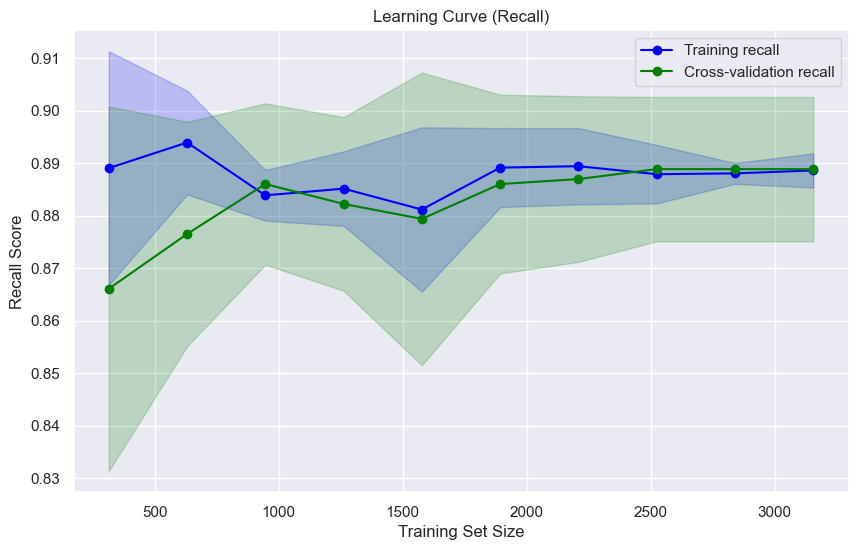

In [20]:
# Define training sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve metrics using recall as scoring
train_sizes, train_scores, valid_scores = learning_curve(
    best_tuned_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='recall',
    train_sizes=train_sizes,
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training recall')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.2, color='blue')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='green', label='Cross-validation recall')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std,
                 alpha=0.2, color='green')

plt.title('Learning Curve (Recall)')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The learning curve plot was generated to show the recall scores for both the training and cross-validation sets as the training size was increased. It is observed that the training recall was maintained at a relatively high level, around 0.88 to 0.89, throughout the range of training sizes. The variability in training recall scores was kept low, as indicated by the narrow shaded area representing the standard deviation.

The cross-validation recall was initially lower when smaller training sizes were used, but it was improved and gradually converged toward the training recall as more data was introduced. A wider variability in cross-validation recall was shown at smaller training sizes, but this variability was reduced with increasing training data. The close alignment of training and validation recall scores suggested that the model was well-fitted, with neither overfitting nor underfitting being indicated.

Good model performance was demonstrated by the recall scores, which were maintained around 0.88 to 0.89, indicating that false negatives were effectively minimized. The stabilization of recall scores at larger training sizes suggested that additional data beyond a certain point did not result in significant improvements. It was concluded that the model’s capacity had been reached with the current features and algorithm.

### 4.5 Threshold Tuning Using Precision-Recall Curve (Go or No Go ?)

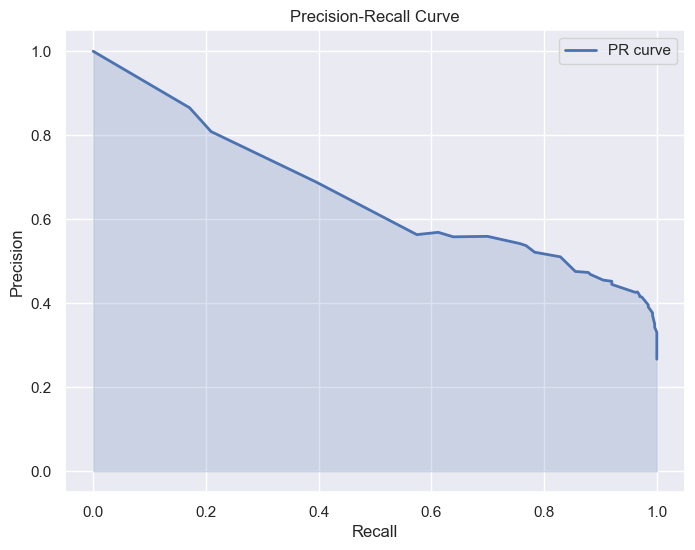

Best threshold by Recall score: 0.1192
Recall score at this threshold: 1.0000
Recall:            1.0000


In [21]:
# Plot Precision-Recall curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', lw=2, label='PR curve')
plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Exclude last point where threshold is not defined (thresholds length is one less than precision/recall)
recall_vals_trimmed = recall_vals[:-1]
thresholds_trimmed = thresholds

# Find threshold that maximizes recall
best_idx = np.argmax(recall_vals_trimmed)
best_threshold = thresholds_trimmed[best_idx]
best_recall = recall_vals_trimmed[best_idx]

print(f"Best threshold by Recall score: {best_threshold:.4f}")
print(f"Recall score at this threshold: {best_recall:.4f}")

# Apply the best threshold to predicted probabilities to get new predictions
y_pred_threshold = (y_proba >= best_threshold).astype(int)

# Calculate metrics using the new predictions
recall = recall_score(y_test, y_pred_threshold)

# Print summary metrics
print(f"Recall:            {recall:.4f}")

The Precision-Recall curve was plotted to evaluate the trade-off between precision and recall at different classification thresholds. The curve was visualized with recall values on the x-axis and precision values on the y-axis, and the area under the curve was shaded to provide a clearer representation of the relationship between these two metrics (Davis & Goadrich, 2006).

A threshold tuning process was conducted by excluding the last recall point where the threshold is undefined. The threshold that maximized recall was identified by finding the index of the highest recall value and selecting the corresponding threshold. This best threshold was found to be approximately 0.1192, at which the recall reached its maximum value of 1.0000.

Using this optimized threshold, new predictions were generated by classifying instances with predicted probabilities greater than or equal to the threshold as positive. The recall score was then recalculated based on these predictions, confirming that a perfect recall of 1.0000 was achieved. This indicates that all positive cases were correctly identified when using the tuned threshold.

While the recall was maximized, it should be noted that the precision decreased as recall increased, as shown by the curve. This trade-off implies that although no positive cases were missed, the number of false positives likely increased, which may affect the overall model performance depending on the application context. Further evaluation considering precision and other metrics may be required to determine whether this threshold tuning represents a "Go" or "No Go" decision for deployment.

However, this decision will be classified as a "No Go" because achieving a perfect recall score of 1.0000 at such a low threshold seems too good to be true. Such an outcome often indicates potential issues such as data leakage, model overfitting, or an unrealistic threshold that may not generalize well to new data. Therefore, caution is advised before adopting this threshold in a real-world setting (Saito & Rehmsmeier, 2015).

## Section 5. Evaluation

### 5.1 Feature Importance Using LIME

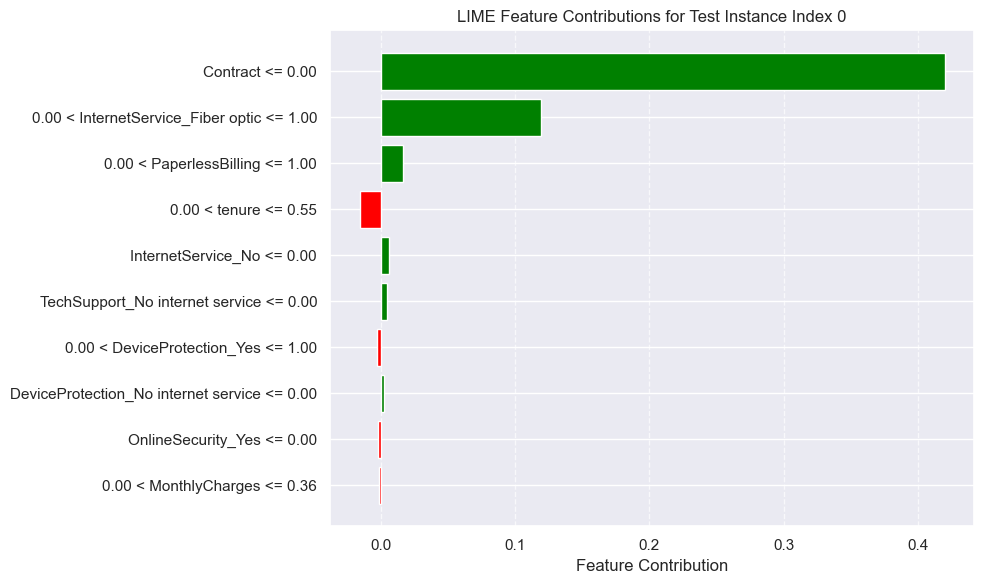

In [22]:
# Index of the test instance to explain
idx = 0

# Extract preprocessor and classifier from the pipeline
preprocessor = best_tuned_pipeline.named_steps['preprocessor']
classifier = best_tuned_pipeline.named_steps['classifier']

# Transform the training data (returns numpy array)
X_train_transformed = preprocessor.transform(X_train)

# Helper function to get feature names after transformation
def get_feature_names(preprocessor):
    feature_names = []

    # Numeric features (scaled)
    numeric_transformer = preprocessor.named_transformers_.get('num')
    if numeric_transformer is not None:
        feature_names.extend(numeric_cols)

    # Binary features (mapped to 0/1)
    binary_transformer = preprocessor.named_transformers_.get('binary')
    if binary_transformer is not None:
        feature_names.extend(binary_cols)

    # Ordinal features (Contract)
    ordinal_transformer = preprocessor.named_transformers_.get('ordinal')
    if ordinal_transformer is not None:
        feature_names.extend(['Contract'])

    # One-hot encoded categorical features
    cat_transformer = preprocessor.named_transformers_.get('cat')
    if cat_transformer is not None:
        ohe = cat_transformer.named_steps['onehot']
        cat_feature_names = ohe.get_feature_names_out(categorical_cols_no_binary)
        feature_names.extend(cat_feature_names)

    return feature_names

# Get feature names after transformation
feature_names = get_feature_names(preprocessor)

# Define a prediction function for LIME that accepts already preprocessed data
def predict_proba_transformed(X):
    return classifier.predict_proba(X)

# Create LIME explainer with transformed training data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names,
    class_names=['No Churn', 'Churn'],
    discretize_continuous=True,
    random_state=42
)

# Transform the test instance to explain
X_test_sample_transformed = preprocessor.transform(X_test.iloc[[idx]])

# Generate explanation for the selected instance
exp = explainer.explain_instance(
    data_row=X_test_sample_transformed[0],
    predict_fn=predict_proba_transformed,
    num_features=10
)

# Extract feature contributions (feature name and weight)
feature_contributions = exp.as_list()

# Separate features and weights, reverse order for plotting (largest on top)
features, weights = zip(*feature_contributions)
features = features[::-1]
weights = weights[::-1]

# Define colors: green for positive, red for negative contributions
colors = ['green' if w > 0 else 'red' for w in weights]

# Display explanation in notebook
# exp.show_in_notebook(show_table=True)

# Plot horizontal bar chart of feature contributions (uncomment to run)
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color=colors)
plt.xlabel('Feature Contribution')
plt.title(f'LIME Feature Contributions for Test Instance Index {idx}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

LIME (Local Interpretable Model-agnostic Explanations) is described as a technique that is used to explain the predictions of any supervised machine learning model by treating it as a black box. It is designed to provide explanations that are locally faithful to the model’s behavior around a specific instance, making the decision-making process more interpretable. Samples are generated around the instance of interest, and a simple, interpretable surrogate model is fitted on these samples to approximate the original model’s predictions. The importance of features contributing to the prediction is then identified, allowing users to understand the reasoning behind complex model outputs in a clear and accessible manner (GeeksforGeeks, 2023).

The feature importance for the selected test instance was examined using LIME. The model’s preprocessor and classifier were extracted from the pipeline, and the training data was transformed accordingly. Feature names were aligned with the transformed data to ensure accurate interpretation. A prediction function was defined to work with the preprocessed data, allowing LIME to generate explanations correctly. The test instance was also transformed before the explanation was produced.

The results showed the top ten features that influenced the model’s prediction. Positive contributions, shown in green, increased the likelihood of the predicted outcome. The “Contract” feature had the strongest positive impact, indicating it played a key role in the prediction. Other features like “InternetService_Fiber optic” and “PaperlessBilling” also supported the prediction but to a lesser degree.

Negative contributions, shown in red, reduced the predicted probability. For example, “tenure” had a negative effect, suggesting that shorter tenure lowered the chance of the predicted outcome. Minor negative impacts were seen from features like “DeviceProtectionYes” and “OnlineSecurityYes.” Overall, the explanation clearly showed how each feature affected the model’s decision for this instance, offering valuable insight into the model’s behavior.

### 5.2 Confusion Matrix Visualization

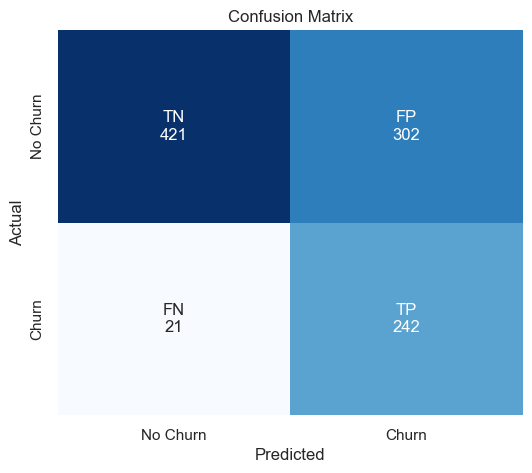

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Labels in confusion matrix order
labels = np.array([['TN', 'FP'],
                   ['FN', 'TP']])

# Annotation: label first, then the count
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm[i, j]}"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 5.3 Counterfactual Analysis

In [24]:
# Churn Rate Before Machine Learning (Actual churn rate in the full dataset)
churn_rate_before_ml = df['Churn'].value_counts(normalize=True)[1] * 100
print(f"Churn Rate before ML: {churn_rate_before_ml:.2f}%")

# Churn Rate After Machine Learning (Predicted churn rate on test data)
# Using best tuned pipeline for prediction on test set
y_pred = best_tuned_pipeline.predict(X_test)

total_test_customers = len(y_pred)
predicted_churn_customers = sum(y_pred)

churn_rate_after_ml = (predicted_churn_customers / total_test_customers) * 100
print(f"Churn Rate predicted by ML model on test set: {churn_rate_after_ml:.2f}%")


Churn Rate before ML: 26.69%
Churn Rate predicted by ML model on test set: 55.17%


## Section 6. Deployment

### 6.1 Save Model Using Joblib

In [25]:
# Define the relative path to save the model
model_save_path = Path("models/best_tuned_pipeline.joblib")

# Create directory if it does not exist
model_save_path.parent.mkdir(parents=True, exist_ok=True)

# Save the best tuned pipeline
joblib.dump(best_tuned_pipeline, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to models\best_tuned_pipeline.joblib


Joblib is used to save and load Python objects easily and quickly. It is designed to handle big data like large arrays and machine learning models. The library is made to work well with Python programs and helps store information on the computer’s disk. It is often used to keep models safe after they are trained so they can be used later without retraining. Joblib also supports running tasks in parallel to make programs faster (Joblib, 2025).

The process of saving a trained model is demonstrated by defining a relative file path where the model will be stored. The necessary directory is created if it does not already exist, ensuring that the save operation can proceed without errors. The model, specifically the best tuned pipeline, is then saved to the specified location using the joblib library. A confirmation message is printed to inform the user that the model has been successfully saved

### 6.2 How to Load and Use Saved Model

In [26]:
# Load the saved model from relative path
model_save_path = Path("models/best_tuned_pipeline.joblib")
loaded_model = joblib.load(model_save_path)
print("Model loaded successfully.")

# Helper function to prepare new data and ensure categorical dtypes match training
def prepare_new_data(data_dict):
    df = pd.DataFrame(data_dict)
    # Convert object columns to categorical dtype
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

# Scenario 1: Customer likely to churn (predicted class = 1)
new_customer_churn = {
    'Dependents': ['No'],
    'tenure': [2],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'InternetService': ['Fiber optic'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'MonthlyCharges': [90.50],
    'TotalCharges': [2 * 90.50]
}

X_new_churn = prepare_new_data(new_customer_churn)

# Predict churn class and probability
churn_pred_churn = loaded_model.predict(X_new_churn)[0]
churn_proba_churn = loaded_model.predict_proba(X_new_churn)[:, 1][0]

print(f"Scenario 1 - Predicted churn class: {churn_pred_churn} (1 = Churn)")
print(f"Scenario 1 - Predicted churn probability: {churn_proba_churn:.4f}")

# Scenario 2: Customer likely to stay (predicted class = 0)
new_customer_no_churn = {
    'Dependents': ['Yes'],
    'tenure': [48],
    'OnlineSecurity': ['Yes'],
    'OnlineBackup': ['Yes'],
    'InternetService': ['DSL'],
    'DeviceProtection': ['Yes'],
    'TechSupport': ['Yes'],
    'Contract': ['Two year'],
    'PaperlessBilling': ['No'],
    'MonthlyCharges': [55.75],
    'TotalCharges': [48 * 55.75]
}

X_new_no_churn = prepare_new_data(new_customer_no_churn)

# Predict churn class and probability
churn_pred_no_churn = loaded_model.predict(X_new_no_churn)[0]
churn_proba_no_churn = loaded_model.predict_proba(X_new_no_churn)[:, 1][0]

print(f"Scenario 2 - Predicted churn class: {churn_pred_no_churn} (0 = No Churn)")
print(f"Scenario 2 - Predicted churn probability: {churn_proba_no_churn:.4f}")

Model loaded successfully.
Scenario 1 - Predicted churn class: 1 (1 = Churn)
Scenario 1 - Predicted churn probability: 0.7816
Scenario 2 - Predicted churn class: 0 (0 = No Churn)
Scenario 2 - Predicted churn probability: 0.1292


The code loads a pre-trained churn prediction model from a specified file path using joblib. A helper function is defined to convert input data dictionaries into pandas DataFrames and to ensure that object-type columns are converted to categorical types, matching the training data format. Two different customer scenarios are created with relevant features, and the helper function is applied to prepare these datasets for prediction. The loaded model is then used to predict both the churn class and the associated probability for each scenario.

The results indicate that the model predicts a high likelihood of churn for the first customer, with a predicted class of 1 and a probability of approximately 0.78. For the second customer, the model predicts a low likelihood of churn, with a predicted class of 0 and a probability of about 0.13. These predictions suggest that the model can effectively distinguish between customers who are likely to leave and those who are likely to stay based on the input features.

### 6.3 Model Limitations
- Model depends on data quality and feature relevance.
- Changes in customer behavior or services may reduce model accuracy over time.
- Periodic retraining and monitoring are recommended.

## Section 7. Conclusion and Recommendations
### 7.1 Conclusion
- Developed model predicts churn with good recall and ROC-AUC.
- Identified key factors influencing churn with interpretable methods.
- Threshold tuning improved recall, important for business objectives.

### 7.2 Recommendations
- Regularly update and monitor model performance.
- Use insights to improve customer retention strategies.
- Consider deploying model with monitoring for data drift.

## References

Batista, G. E. A. P. A., Prati, R. C., & Monard, M. C. (2004). A study of the behavior of several methods for balancing machine learning training data. ACM SIGKDD Explorations Newsletter, 6(1), 20–29. https://doi.org/10.1145/1007730.1007735

Belcic, I. (2024, October 15). *What is classification in machine learning?* Retrieved from https://www.ibm.com/think/topics/classification-machine-learning

Bhatnagar, A., & Srivastava, S. (2025). Customer churn analysis in telecom. *Computing Online.* https://computingonline.net/computing/article/view/3873

BlastChar. (2018). *Telco customer churn prediction* [Dataset]. Kaggle. https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Britto, F. (2024, September 9). Churn in telecom: What it is and its impacts. *SYDLE.* https://www.sydle.com/blog/churn-telecom-66b4c9e8b2713612fa17da85

Davis, J., & Goadrich, M. (2006). The relationship between Precision-Recall and ROC curves. *Proceedings of the 23rd International Conference on Machine Learning (ICML ’06)*, 233–240. https://doi.org/10.1145/1143844.1143874

Galarnyk, M. (2025, February 3). *Train test split: What it means and how to use it.* Built In. https://builtin.com/data-science/train-test-split

GeeksforGeeks. (2024, September 4). *Top 6 machine learning classification algorithms.* Retrieved from https://www.geeksforgeeks.org/top-6-machine-learning-algorithms-for-classification/

GeeksforGeeks. (2025, January 23). *Ensemble learning.* Retrieved from https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/

GeeksforGeeks. (2023, April 11). *Explainable AI (XAI) using LIME.* https://www.geeksforgeeks.org/introduction-to-explainable-aixai-using-lime/

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. *IEEE Transactions on Knowledge and Data Engineering, 21*(9), 1263–1284. https://doi.org/10.1109/TKDE.2008.239

IBM. (n.d.). *What are Naïve Bayes classifiers?* Retrieved from https://www.ibm.com/think/topics/naive-bayes

Idris, N. L. (2024, July 31). *Streamlining data preprocessing and cleaning in a machine learning pipeline.* Medium. https://medium.com/@nafisaidris413/streamlining-data-preprocessing-and-cleaning-in-a-machine-learning-pipeline-a6e602de2e57


imbalanced-learn developers. (2024a). Over-sampling methods. *imbalanced-learn.* https://imbalanced-learn.org/stable/references/over_sampling.html

imbalanced-learn developers. (2024b). Combination of over- and under-sampling methods. *imbalanced-learn.* https://imbalanced-learn.org/stable/references/combine.html

imbalanced-learn Developers. (2024c). SMOTEENN. Retrieved May 17, 2025, from https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#

Imhoff, C., Galemmo, N., & Geiger, J. G. (2003). *Mastering data warehouse design: Relational and dimensional techniques*. John Wiley & Sons.

Investopedia Team. (2024, March 21). Churn rate: What it means, examples, and calculations. *Investopedia.* https://www.investopedia.com/terms/c/churnrate.asp

IQ Team. (2025, February 23). Top 17 customer churn datasets and projects (Updated for 2025). *Interview Query.* https://www.interviewquery.com/p/customer-churn-datasets

Jain, A. K. (2010). Data clustering: 50 years beyond K-means. *Pattern Recognition Letters, 31*(8), 651–666. https://doi.org/10.1016/j.patrec.2009.09.011

Kumari, D., Singh, S. K., Katira, S. S., Srinivas, I. V., & Salunkhe, U. (2025). Telecom customer churn forecasting using machine learning: A data-driven predictive framework. *Metallurgical and Materials Engineering, 31*(4), 922–929. https://doi.org/10.63278/1536

Liu, H., Motoda, H., Setiono, R., & Zhao, Z. (2020). Feature selection: An ever-evolving frontier in data mining. *Journal of Machine Learning Research, 21*(1), 1–50.

Luck, I. (2023, April 4). What is customer churn? Complete meaning & guide. *CustomerGauge.* https://customergauge.com/customer-churn

Mahesh, T. R., Kumar, V., Dhilip, K., Geman, O., Margala, M., & Guduri, M. (2023). The stratified K-folds cross-validation and class-balancing methods with high-performance ensemble classifiers for breast cancer classification. *Healthcare Analytics,* 4, 100247. https://doi.org/10.1016/j.health.2023.100247

McKinney, W. (2017). *Python for data analysis: Data wrangling with pandas, NumPy, and IPython* (2nd ed.). O'Reilly Media.

Mukaka, M. M. (2012). A guide to appropriate use of correlation coefficient in medical research. *Malawi Medical Journal*, 24(3), 69–71. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/

Murel, J., & Kavlakoglu, E. (2024, March 18). *What is ensemble learning?* Retrieved from https://www.ibm.com/think/topics/ensemble-learning

Saito, T., & Rehmsmeier, M. (2015). The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. *PLOS ONE,* 10(3), e0118432. https://doi.org/10.1371/journal.pone.0118432

Schober, P., Boer, C., & Schwarte, L. A. (2018). Correlation coefficients: Appropriate use and interpretation. *Anesthesia & Analgesia*, 126(5), 1763–1768. https://doi.org/10.1213/ANE.0000000000002864

scikit-learn developers. (2025). sklearn.ensemble.AdaBoostClassifier. *Scikit-learn.* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

O’Brien, K., & Downie, A. (2024, September 9). What is customer churn? *IBM.* https://www.ibm.com/think/topics/customer-churn

Oracle Community. (2024). OAC - Table visualization in DV duplicate rows, but LSQL is correct. *Oracle Community.* https://community.oracle.com/products/oracleanalytics/discussion/21184/oac-table-visualization-in-dv-duplicate-rows-but-lsql-is-correct

VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data*. O'Reilly Media.

Wickham, H., & Grolemund, G. (2017). *R for data science: Import, tidy, transform, visualize, and model data*. O'Reilly Media.
